In [22]:
!pip install matplotlib
import matplotlib.pyplot as matplotlib
import numpy as np

In [23]:
def CalculateDesireOutput(inputs, threshold):
    desire_values = np.zeros(inputs.shape[0])
    for x in range(inputs.shape[0]):
        if inputs[x] > threshold:
            desire_values[x] = 1
        else:
            desire_values[x] = 0
    return desire_values

def weightSum(inputs, weights, bias):
  return (inputs[0] * weights[0] + inputs[1] * weights[1]) + bias

def activation_function(x, threshold):
    if x >= threshold:
      return 1
    else:
      return 0
#

def interactions(iteration_number, inputs, threshold, desiredOutput):
    num_samples = inputs.shape[0] # =4
    weights = np.zeros(inputs.shape)
    bias = np.zeros(num_samples)
    alpha = 0.1
    prediction = np.zeros(num_samples)
    erro = 0
    ErrorVector = []

    for n in range(iteration_number):
      #returnSum = 0

      # prints
      print('\n Rodada ', n+1 , ':\n')
      print
      print('x1:   x2:    w1:    w2:   bias:   returno:   classe: ')

      for x in range(num_samples):

        returnSum = weightSum(inputs[x], weights[x], bias[x])
        prediction[x] = activation_function(returnSum, threshold)
        ErrorVector.append((desiredOutput[x] - prediction[x]))

        # treinamento

        print(inputs[x][0],'   ', inputs[x][1],'   ', '%.1f' % weights[x][0],'   ',  weights[x][1], '   ',   bias[x], '   ', prediction[x], '       ', desiredOutput[x])

        if desiredOutput[x] != prediction[x]:
          weights[x] += (alpha * (desiredOutput[x] - prediction[x]) * inputs[x])
          bias[x] += alpha * (desiredOutput[x] - prediction[x])


    return prediction, weights, bias, ErrorVector


    # tirei a declaração de returnSum, e o +=, quero saber do bias - o que ele faz ?



In [24]:
inputs = np.array([ [0,0], [0,1], [1,0], [1,1] ])

threshold = 1

# caso OR
#iteration_number = 6 # ou 101 com alpha = 0.01
#desiredOutput = [0, 1, 1, 1]

# caso AND
iteration_number = 5  # ou 35 com alpha = 0.01
desiredOutput = [0, 0, 0, 1]

returnPerceptron, weights, bias, ErrorVector = interactions(iteration_number, inputs, threshold, desiredOutput)

print('Retorno do Perceptron:')
print(returnPerceptron)
print('Resultado esperado:')
print(desiredOutput)


 Rodada  1 :

x1:   x2:    w1:    w2:   bias:   returno:   classe: 
0     0     0.0     0.0     0.0     0.0         0
0     1     0.0     0.0     0.0     0.0         0
1     0     0.0     0.0     0.0     0.0         0
1     1     0.0     0.0     0.0     0.0         1

 Rodada  2 :

x1:   x2:    w1:    w2:   bias:   returno:   classe: 
0     0     0.0     0.0     0.0     0.0         0
0     1     0.0     0.0     0.0     0.0         0
1     0     0.0     0.0     0.0     0.0         0
1     1     0.1     0.1     0.1     0.0         1

 Rodada  3 :

x1:   x2:    w1:    w2:   bias:   returno:   classe: 
0     0     0.0     0.0     0.0     0.0         0
0     1     0.0     0.0     0.0     0.0         0
1     0     0.0     0.0     0.0     0.0         0
1     1     0.2     0.2     0.2     0.0         1

 Rodada  4 :

x1:   x2:    w1:    w2:   bias:   returno:   classe: 
0     0     0.0     0.0     0.0     0.0         0
0     1     0.0     0.0     0.0     0.0         0
1     0     0.0     0.0 

# Gráficos

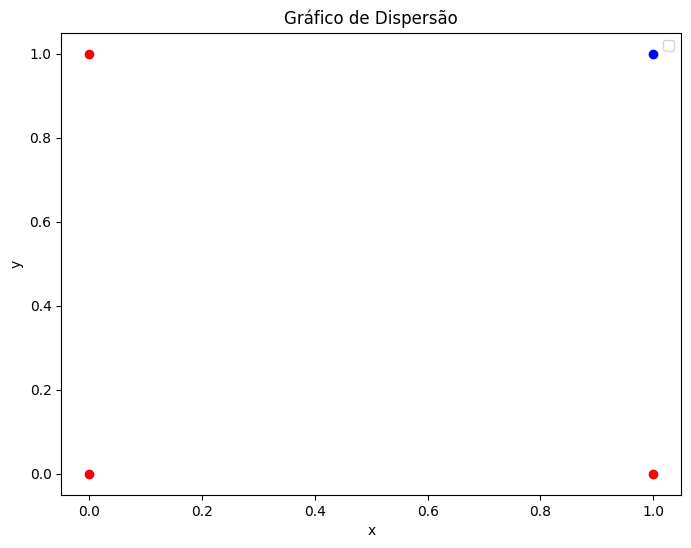

In [25]:
# não mexi daqui para baixo ainda

matplotlib.figure(figsize=(8, 6))
for x in range(inputs.shape[0]):
  if(desiredOutput[x] == 1):
    matplotlib.scatter(inputs[x][0], inputs[x][1], color='blue')

  else:
    matplotlib.scatter(inputs[x][0], inputs[x][1], color='red')

matplotlib.title('Gráfico de Dispersão')
matplotlib.xlabel('x')
matplotlib.ylabel('y')

matplotlib.legend()

matplotlib.show()

Pesos:
0.4
Bias:
[0.  0.  0.  0.4]


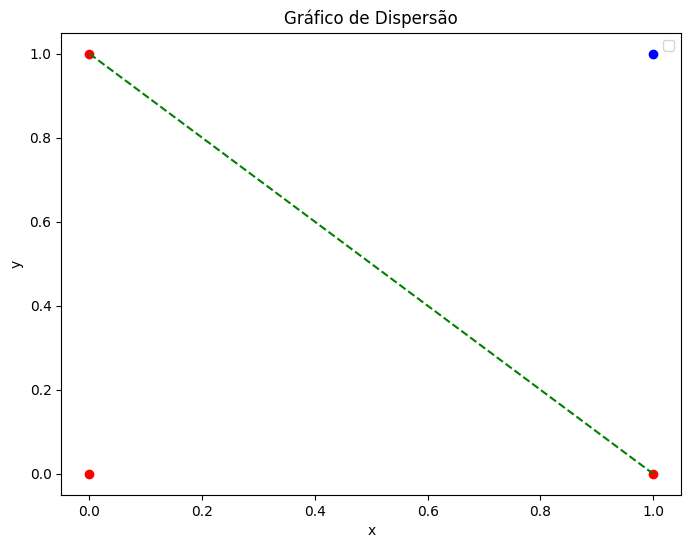

In [26]:
print('Pesos:')
print(weights[inputs.shape[0]-1][0])
print('Bias:')
print(bias)
#Wweights = weights[inputs.shape[0]-1][0]
bias2 = bias[inputs.shape[0]-1]


matplotlib.figure(figsize=(8, 6))
for x in range(inputs.shape[0]):
  if(desiredOutput[x] == 1):
    matplotlib.scatter(inputs[x][0], inputs[x][1], color='blue')

  else:
    matplotlib.scatter(inputs[x][0], inputs[x][1], color='red')

x_points = np.linspace(0, 1, 100)
#y_points = -(weights[inputs.shape[0]-1][0]/weights[inputs.shape[0]-1][1]) * x_points - bias/weights[inputs.shape[0]-1][1]
y_points = (-(weights[inputs.shape[0]-1][0]*x_points-bias2))/weights[inputs.shape[0]-1][1]
matplotlib.plot(x_points, y_points, 'g--')

matplotlib.title('Gráfico de Dispersão')
matplotlib.xlabel('x')
matplotlib.ylabel('y')

matplotlib.legend()

matplotlib.show()

Pesos:
0.4
Bias:
[0.  0.  0.  0.4]


ValueError: operands could not be broadcast together with shapes (100,) (4,) 

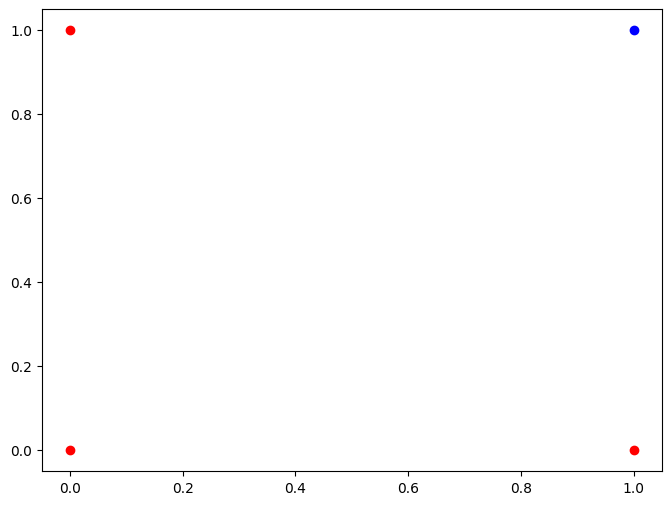

In [27]:
print('Pesos:')
print(weights[inputs.shape[0]-1][0])
print('Bias:')
print(bias)
#Wweights = weights[inputs.shape[0]-1][0]

matplotlib.figure(figsize=(8, 6))
for x in range(inputs.shape[0]):
  if(desiredOutput[x] == 1):
    matplotlib.scatter(inputs[x][0], inputs[x][1], color='blue')

  else:
    matplotlib.scatter(inputs[x][0], inputs[x][1], color='red')

x_points = np.linspace(0, 2, 100)
y_points = -(weights[inputs.shape[0]-1][0]/weights[inputs.shape[0]-1][1]) * x_points - bias/weights[inputs.shape[0]-1][1]
matplotlib.plot(x_points, y_points, 'g--', label='Linha de Separação')
matplotlib.title('Gráfico de Dispersão')
matplotlib.xlabel('x')
matplotlib.ylabel('y')

matplotlib.legend()

matplotlib.show()

In [ ]:
print(ErrorVector)
matplotlib.plot(range(1,len(ErrorVector)+1),ErrorVector,marker='o')
matplotlib.xlabel('Epochs')
matplotlib.ylabel('Number of misclassifications')
matplotlib.show()